In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Основные и промежуточные деления осей координат

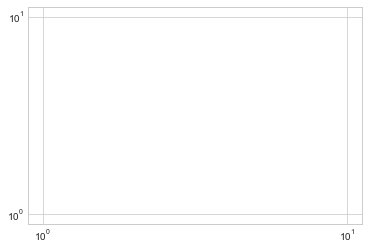

In [2]:
# На каждой оси координат имеются основные и промежуточные метки делений
# Основные обычно больше и более заметны
# По умолчанию matplotlib редко использует промежуточные, но одно из мест где их можно увидеть логарифмические графики
ax = plt.axes(xscale='log', yscale='log') # хз чего не работает)

In [3]:
# пользовательские настройки для расположения и меток делений можно задать с помощью formatter и locator
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

#### Прячем деления или метки

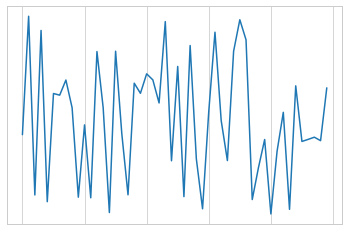

In [4]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())     # Убираем деления(линии), а следовательно и метки
ax.xaxis.set_major_formatter(plt.NullFormatter()) # Убираем метки, но оставили линии координатной сетки
# хз почему нельзя оставить метки, но убрать линии)

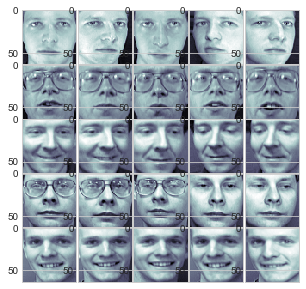

In [5]:
# Отсутствие делений удобно во многих случаях, например, если нужно отобразить сетку изображений.
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Получаем данные по лицам людей из Scikit-learn
import os

# os.path.dirname(os.path.abspath('4.3 Matplotlib(настройка осей координат).ipynb'))
path = os.path.join(os.getcwd(), 'Sklearn_data')

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(data_home=path, download_if_missing=False).images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

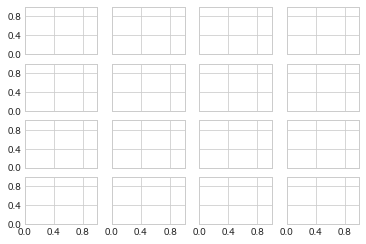

In [6]:
# Задание кол-ва делений вручную
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))


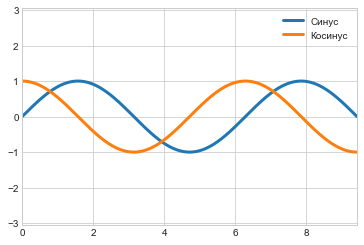

In [7]:
# Для более точных настроек расположений делений используем plt.MultipleLocator

# Например стандартные настройки делений не очень подходят этому графику
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Синус')
ax.plot(x, np.cos(x), lw=3, label='Косинус')

# Настраиваем сетку, легенду и задаем пределы осей координат
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)
fig;


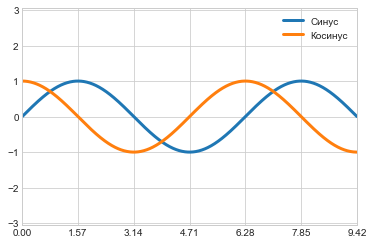

In [8]:
# Настравиваем более подходящие деления
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))  # этих делений вообще не видно:( хз
fig

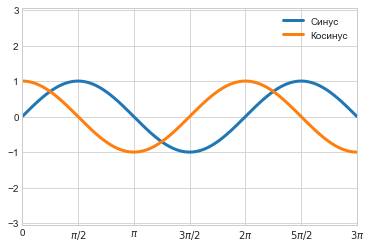

In [9]:
# Модифицируем форматы названий делений по x
def format_func(value, tick_number):
    # Определяем кол-во кратных пи/2 значений
    # в требуемом диапазоне
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return '0'
    elif N == 1:
        return r'$\pi/2$'    # LaTeX
    elif N == 2:
        return r'$\pi$'
    elif N % 2 > 0:
        return r'${0}\pi/2$'.format(N)
    else:
        return r'${0}\pi$'.format(N // 2)

# Встроенного форматтера для установки делений Пи нет    
# Поэтому воспользуемся plt.FuncFormatter, который принимает функцию и устанавливает с помощью нее новые подписи делений
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))  
fig

# plt.FuncFormatter() обеспечивает возможность чрезвычайно тонкого контроля внешнего вида делений графика
# и очень удобен при подготовке графиков для презентаций и публикаций

##### Краткая сводка локаторов и форматеров
Python для решения сложных задач(глава 4, стр. 328) - две таблицы

## Пользовательские настройки Matplotlib

#### Выполнение пользовательских настроек графиков вручную

In [10]:
plt.style.use('classic')
import numpy as np

%matplotlib inline

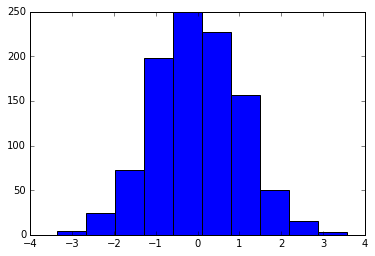

In [11]:
x = np.random.randn(1000)
plt.hist(x);

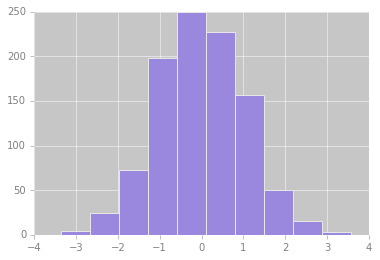

In [12]:
# Мы можем настроить ее вид вручную, превратив эту гистограмму в намного более приятный глазу вид

# используем серый фон
ax = plt.axes(facecolor='#C6C6C6')
ax.set_axisbelow(True)

# Рисуем сплошные белые линии сетки
plt.grid(color='w', linestyle='solid')

# Скрываем основные линии осей координат
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Скрываем деления сверху
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Осветляем цвет делений и меток
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# Задаем цвет заливки и границ гистограммы
ax.hist(x, edgecolor='#E6E6E6', color='#9988DD');

### Изменяем значения по умолчанию

In [13]:
# Для начала сохраняем стандартные настройки по умолчанию
IPython_default = plt.rcParams.copy()

In [14]:
from matplotlib import cycler
colors = cycler('color', ['#DD7777', '#3377AA', '#9988DD', '#EEAA33', '#77AA77', '#FFAAAA'])
plt.rc('axes', facecolor='#C6C6C6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
# Эти настройки можно сохранить в файле .matplotlibrc

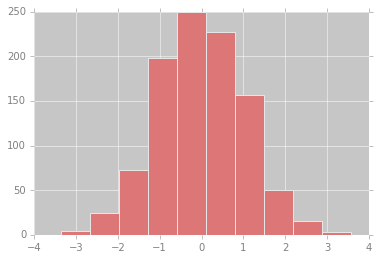

In [15]:
# Описав новые стандартные настройки можем построить график
plt.hist(x);

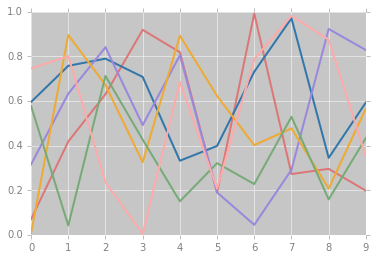

In [16]:
for i in range(6):
    plt.plot(np.random.rand(10))

#### Таблицы стилей

In [17]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [18]:
# Синтаксис plt.style.use('stylename') переключает таблицу стиля, но он изменяет стиль до конца сеанса
# В качестве альтернативы можно воспользоваться контекстным менеджером
# with plt.style.context('stylename'):
#     make_a_plot()

In [19]:
# Создадим функцию, рисующую два простейших графика
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [20]:
# Востанавливаем стиль по умолчанию
plt.rcParams.update(IPython_default);

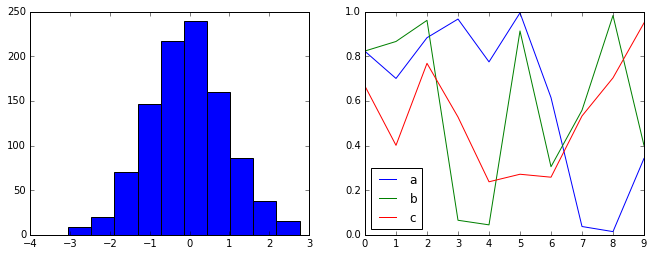

In [21]:
# Теперь посмотрим, ка выглядят наши графики в стиле по умолчанию
hist_and_lines()

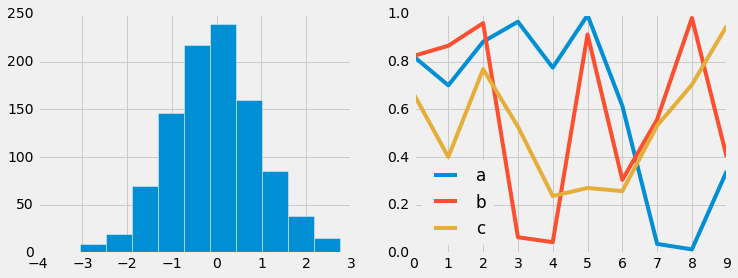

In [22]:
# Стиль FiveThirstyEight
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

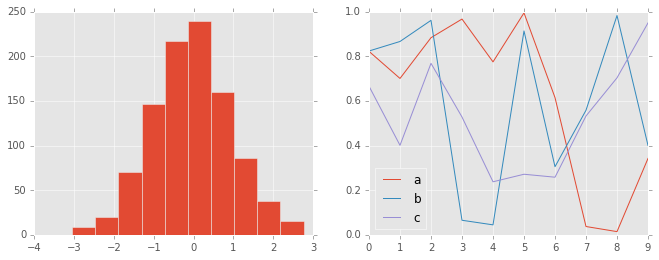

In [23]:
# Стиль ggplot подражает пакету ggplot из языка R
with plt.style.context('ggplot'):
    hist_and_lines()

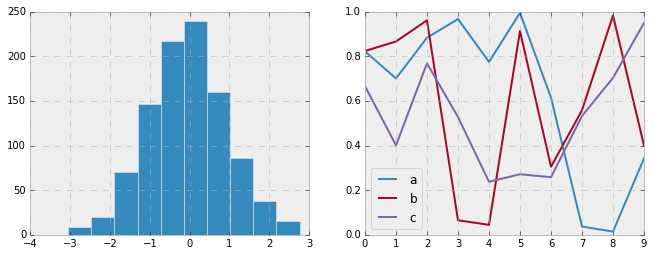

In [24]:
# Существует замечательная онлайн-книга "Байесовские методы для хакеров"
# Стиль графиков из этой книги - 'bmh'

with plt.style.context('bmh'):
    hist_and_lines()

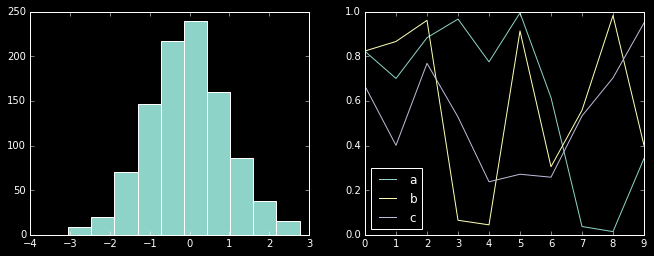

In [25]:
# стиль с темным фоном
with plt.style.context('dark_background'):
    hist_and_lines();

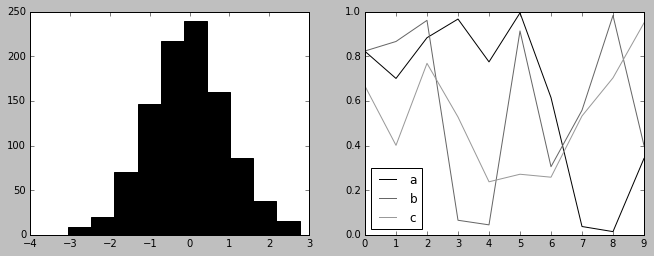

In [26]:
# стиль с темным фоном
with plt.style.context('grayscale'):
    hist_and_lines();

In [27]:
import matplotlib as mpl
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

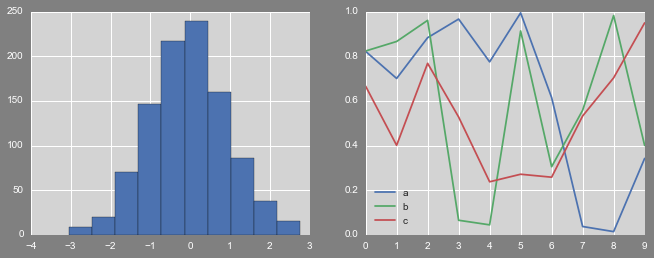

In [28]:
# seaborn
import seaborn as sns
sns.set()

sns.set(rc={'axes.facecolor':'lightgray', 'lines.color': 'g', 'ytick.color':'white', 'xtick.color':'white', 'figure.facecolor':'gray', })
# sns.set_palette('Pastel1')
# with plt.style.context('seaborn-pastel'):
hist_and_lines();


## Seaborn

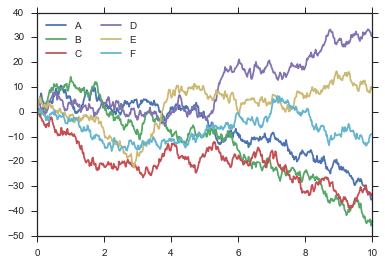

In [29]:
# API Matplotlib относительно низкоуровневый и это требует немало шаблонного кода
# Matplotlib была создана на десять лет раньше Pandas и поэтому не ориентирована на работу с объектами DataFrame
# Seaborn решает эти вопросы. эта библиотека предлоставляет API поверх Matplotlib.
# Она обеспечивает разумные варианты стилей графиков и цветов по умолчанию. Функции для их простого построения.
# И хорошо интегрируется с объектами DataFrame.
plt.style.use('seaborn-ticks')
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [30]:
# Основная идея Seaborn предоставление высокоуровневых команд для создания множества различных типов графиков,
# удобных для исследования статистичесих моделей и даже подгонки статических моделей
plt.style.use('seaborn-darkgrid')
import pandas as pd

#### Гистограммы, KDE и плотности

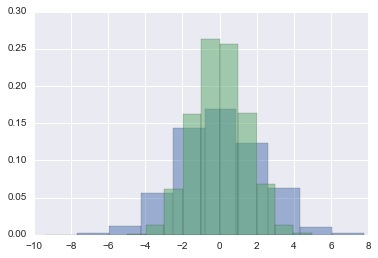

In [31]:
# построить гистограмму в matplotlib довольно просто
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

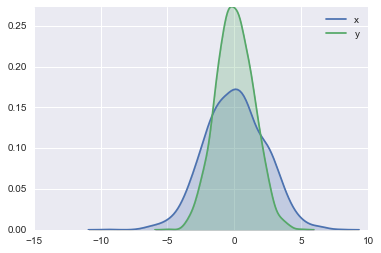

In [32]:
# Вместо гистограммы можно получить гладку оценку распределения путем ядерной оценки плотности распределения
# которую Seaborn выполняет с помощью sns.kdeplot
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


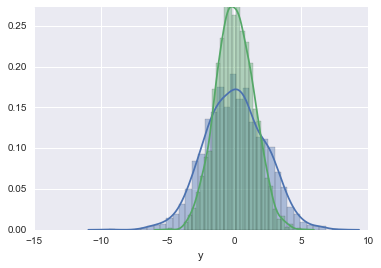

In [33]:
# с помощью функции distplot можно сочетать гистограммы и KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


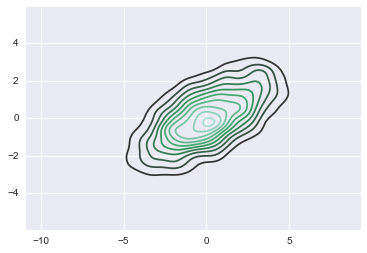

In [34]:
# Если передать функции kdeplot весь двумерный набор данных, можно получить двумерную визуализацию
sns.kdeplot(data);
# Но видимо все таки лучше передавать столбцы по отдельности, т.к. в будущем только такой формат будет возможен

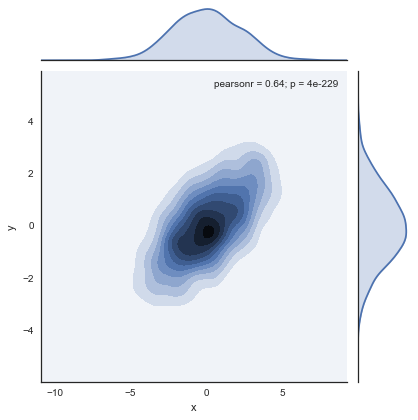

In [35]:
# Посмотреть на совместные и частные распределения можно воспользовавшись функцией sns.jointplot

# Зададим для этого графика белый фон
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


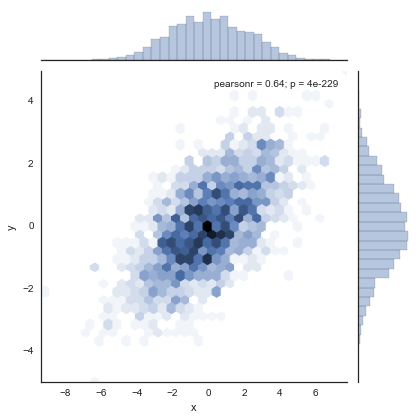

In [36]:
# Функции jointplot можно перевадать и другие параметры, например можно воспользоваться гистограммой на базу шестиугольников
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

In [37]:
# При обобщений графиков совместных распределений на наборы данных больштх размерностей используются графики пар
# Продемонстрируем их на примере данных iris
from sklearn.datasets import load_iris

data = load_iris()
iris = pd.DataFrame(data.data, columns=['Длина чашелистника', 'Ширина чашелистника', 'Длина лепестка', 'Ширина лепестка'])
iris['Код_Вида'] = data.target
# iris.head()
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
target_names = pd.DataFrame(data.target_names, columns=['Вид'])
# target_names
iris = pd.merge(iris, target_names, left_on='Код_Вида', right_index=True).drop('Код_Вида', axis=1)
iris.head()

,Длина чашелистника,Ширина чашелистника,Длина лепестка,Ширина лепестка,Вид
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


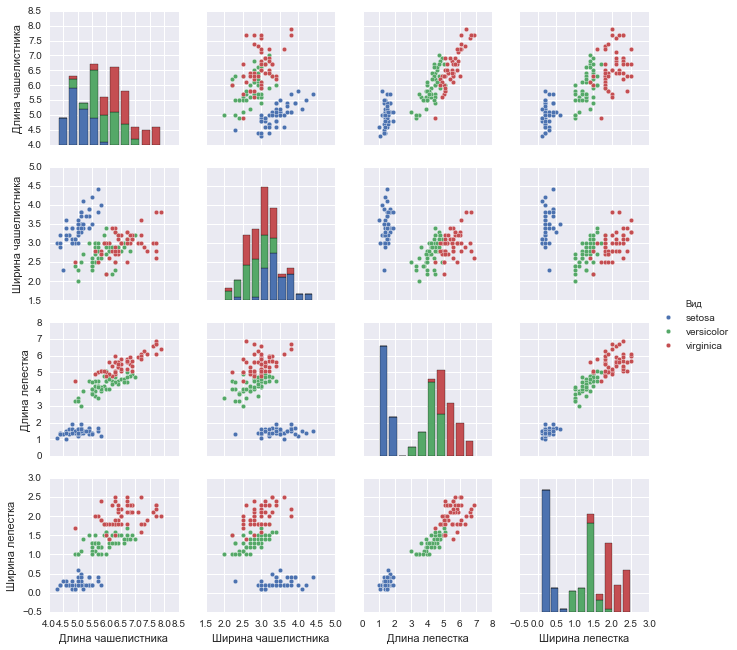

In [39]:
sns.pairplot(iris, hue='Вид', size=2.3);

### Фасетные гистограммы

In [40]:
import os

# os.path.dirname(os.path.abspath('4.3 Matplotlib(настройка осей координат).ipynb'))
os.path.join(os.getcwd(), 'Seaborn')

'C:\\MLPath\\Studying\\IPython NumPy Pandas MatPlotLib\\Seaborn'

In [41]:
# import os

# # os.path.dirname(os.path.abspath('4.3 Matplotlib(настройка осей координат).ipynb'))
# path = os.path.join(os.getcwd(), 'Seaborn')

# # Рассмотрим данные отображающие чаевые персоналу ресторана
# tips = sns.load_dataset('tips', data_home=path)

tips = pd.read_csv('Seaborn\\tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


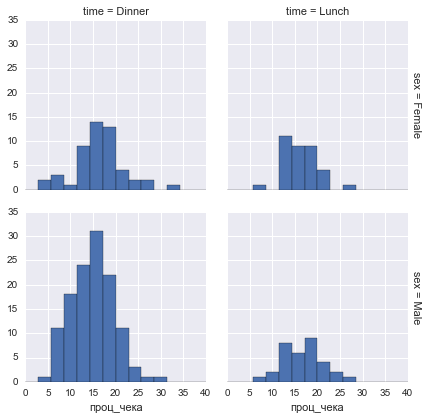

In [42]:
tips['проц_чека'] = 100 * tips['tip'] / tips['total_bill']

# Иногда оптимальный способ представления данных - гистограммы подмножеств
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'проц_чека', bins=np.linspace(0, 40, 15));

### Графики факторов

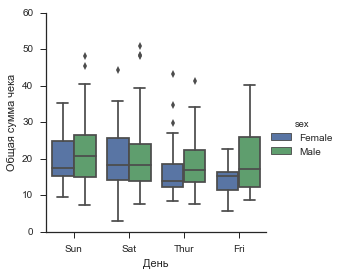

In [43]:
# Графики факторов пазволяют просматривать распределения параметра по интервалам, задаваемых посредством другого параметра
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('День', 'Общая сумма чека'); # Порядок дней конечне случайный, но для примера сойдет)

### Совместные распределения

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


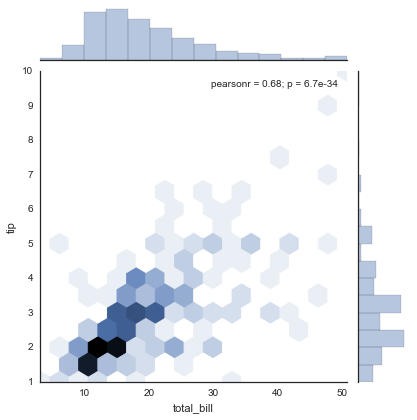

In [44]:
# Мы можем воспользоваться функцией sns.jointplot для отображения совместного распределения между различными наборами данных,
# а также соответствующих частных распределений

with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex');


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


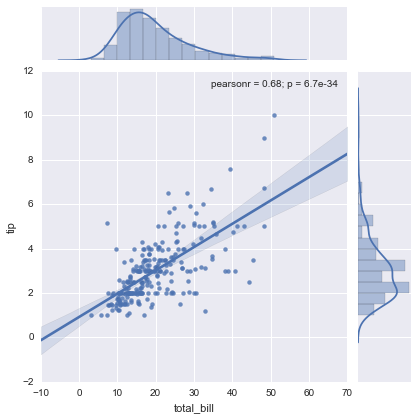

In [45]:
# График совместного распределения позволяется даже выполнять атоматическую ядерную оценку плотности распределения и регрессию

sns.jointplot('total_bill', 'tip', data=tips, kind='reg');

### Столбчатые диаграммы

In [46]:
# Загрузим данные по планетам

# path = os.path.join(os.getcwd(), 'Seaborn')
# sns.load_dataset('planets', data_home=path)

planets = pd.read_csv('Seaborn\\planets.csv')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


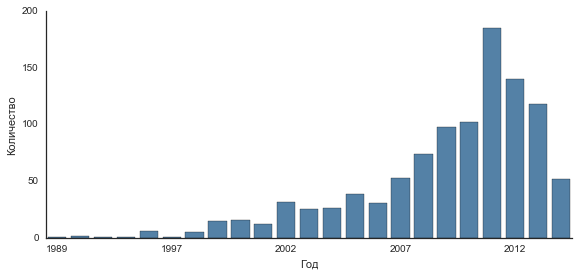

In [47]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)
    g.set_axis_labels('Год', 'Количество')

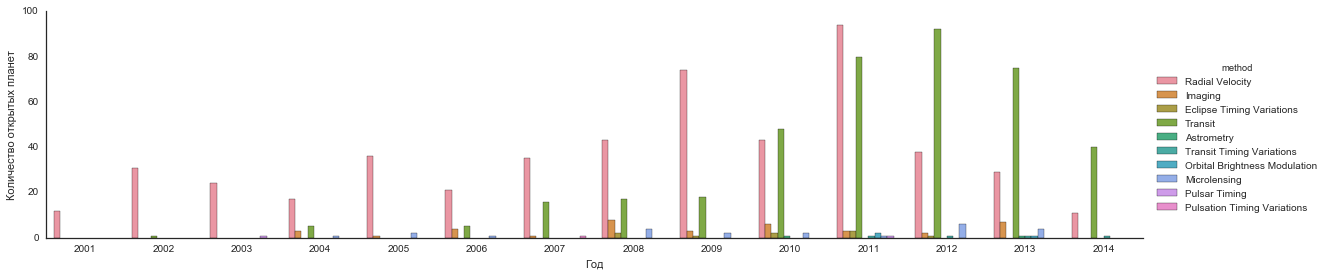

In [48]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_axis_labels('Год', 'Количество открытых планет')

### Пример: время прохождения марафона

In [49]:
# marathon = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
# marathon.to_csv('marathon.csv')
marathon = pd. read_csv('marathon.csv', index_col=0)
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [51]:
# По умолчанию Pandas загружает столбцы с временем, как строки
marathon.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [76]:
import datetime
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)  # заменил pd.datetime.timedelta на это) т.к. эта версия устаревает

marathon = pd.read_csv('marathon.csv', converters={'split':convert_time, 'final':convert_time}, index_col=0)
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [77]:
# теперь типы определяются правильно
marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [78]:
# добавим столбцы в секундах
marathon['split_sec'] = marathon['split'].astype(np.int64) / 1E9  # Это видимо миллиард
marathon['final_sec'] = marathon['final'].astype(np.int64) / 1E9  
# в 64-битной версии IPython возникает ошибка преобразования типа в int поэтому используем np.int64
marathon.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [79]:
marathon.dtypes

age                    int64
gender                object
split        timedelta64[ns]
final        timedelta64[ns]
split_sec            float64
final_sec            float64
dtype: object

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


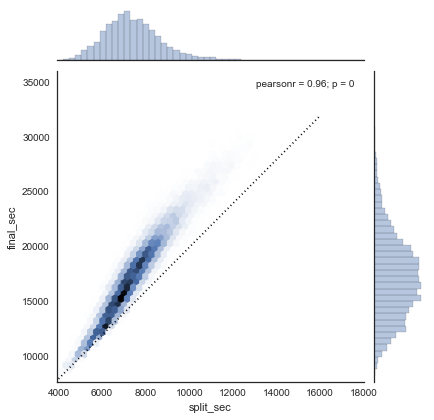

In [80]:
# Нарисуем график для представления данных
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', marathon, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), 
                    np.linspace(8000, 32000), ':k')
# пугктирная линия показывает каким бы было время прохождения всего марафона, если бы бегуны бежали с одинаковой скоростью
# Распределения лежит выше линии значит, что большинство бегунов снижает скорость по мере прохождения дистанции
# Но бывают бегуны ускоряющиеся во время второй части дистанции это говорит о обратном распределении сил

In [81]:
# Создадим столбец показывающий степень прямого или обратного распределения сил
marathon['split_frac'] = 1 - 2 * marathon['split_sec'] / marathon['final_sec']
marathon.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


37250 251


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


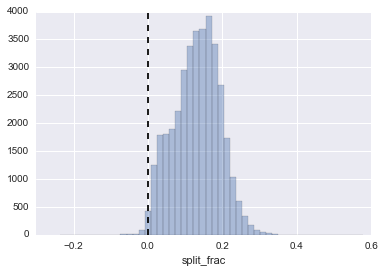

In [97]:
# Если этот новый коэффициент меньше нуля то значит спортсмен распределял свои силы в обратной пропорции
sns.distplot(marathon['split_frac'], kde=False);
plt.axvline(0, color='k', linestyle='--');
print(marathon.shape[0], sum(marathon.split_frac < 0)) # количество спортсменов с обратным распределением 
# Только 251 участник из почти 40000 тысяч распределяет силы в обратной пропорции

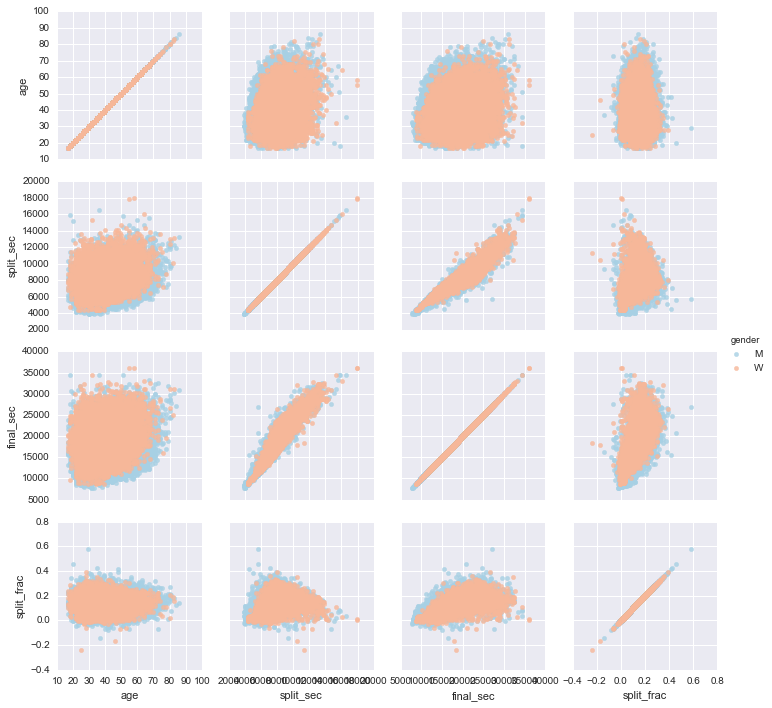

In [101]:
# Выясним существует ли какая-нибудь корреляция
g = sns.PairGrid(marathon, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

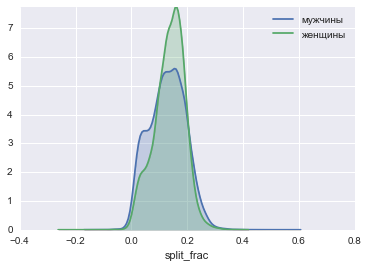

In [107]:
# Интересны различия между мужчинами и женщинами
# Рассмиотрим гистограмму распределения сил этих двух групп
sns.kdeplot(marathon.split_frac[marathon.gender=='M'], label='мужчины', shade=True)
sns.kdeplot(marathon.split_frac[marathon.gender=='W'], label='женщины', shade=True)
plt.xlabel('split_frac');
# Интересно что мужчин, которые распределяли свои силы поровну намного больше чем женщин

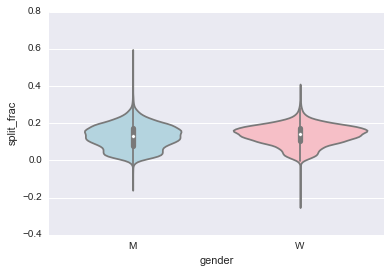

In [109]:
sns.violinplot('gender', 'split_frac', data=marathon, palette=['lightblue', 'lightpink']);

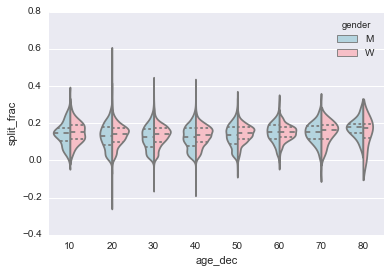

In [112]:
# попбробуем разобраться в чем дело, взглянув на эти распределения как на функцию возраста
marathon['age_dec'] = marathon.age.map(lambda age: 10 * (age // 10))

men = (marathon.gender == 'M')
women = (marathon.gender == 'W')
with sns.axes_style(style=None):
    sns.violinplot('age_dec', 'split_frac', hue='gender', data=marathon,
                   split=True, inner='quartile', palette=['lightblue', 'lightpink']);

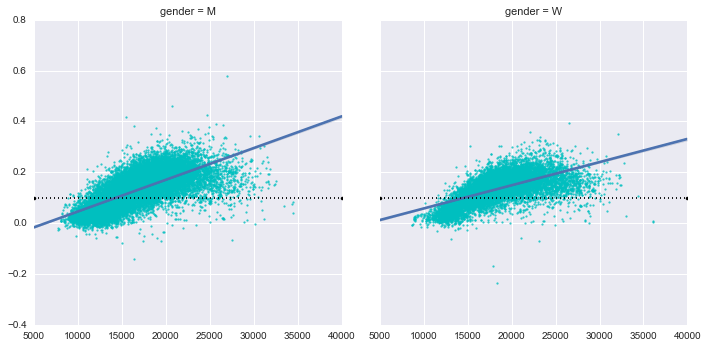

In [117]:
# Определить существует ли корреляция между обратным распределением сил и быстрым прохождением марафона 
# нам поможет линейная регрессия. 
# Ее нам поможет функция regplot, автоматически выполняющая подбор парметров линейной регрессии
# lmplot комбинирует функции regplot и FacetGrid для создания сразу нескольких графиков regplot одной строкой
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=marathon, 
               markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=':');
# Как видно люди с низким значением распределения сил - элитные бегуны финиширующие в переделах 15000 секунд
# Линенейная регрессия явно это показывает 